<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/18_Natural_Language_Processing_with_spaCy/01_Introduction_to_NLP_and_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Introduction to NLP and spaCy

Learn spaCy, the fast-growing industry-standard NLP library, for tasks like tokenization, parsing, and named entity recognition. Master core operations, use classes like Doc and Token, and train models. Extract terms with pattern matching, create custom pipeline components, and handle real-world examples for your NLP projects.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/15_Hyperparameter_Tuning_in_Python/Dataset/results_df.csv"
# Read the CSV file
# Apply pd.to_numeric only to relevant columns, excluding 'text'
results_df = pd.read_csv(url)


display(results_df.head())

### Natural Language Processing (NLP) basics

**Doc container in spaCy**  
The first step of a spaCy text processing pipeline is to convert a given text string into a Doc container, which stores the processed text. In this exercise, you'll practice loading a spaCy model, creating an nlp() object, creating a Doc container and processing a text string that is available for you.

en_core_web_sm model is already downloaded.



In [6]:
!python3 pip install spacy
!python3 -m spacy download en_core_web_sm

python3: can't open file '/content/pip': [Errno 2] No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
# Load en_core_web_sm and create an nlp object
import spacy
nlp = spacy.load("en_core_web_sm")

text = "NLP is becoming increasingly popular for providing business solutions."

# Create a Doc container for the text object
doc = nlp(text)

# Create a list containing the text of each token in the Doc container
print([token.text for token in doc])

# You just imported a spaCy model successfully and accessed the tokens of a Doc object, which was the result of a tokenization process.

['NLP', 'is', 'becoming', 'increasingly', 'popular', 'for', 'providing', 'business', 'solutions', '.']


**NER use case**  
NLP has many applications across different industries such as sentiment analysis, named entity recognition and chatbots.

Is the following a correct definition for named entity recognition?

"Given a string of text, named entity recognition is identifying and categorizing entities in text."

    -> true


    Perfect! Given a text string, named-entity recognition classifies named entities mentioned in unstructured text into pre-defined categories as described in the video.

**Tokenization with spaCy**  
In this exercise, you'll practice tokenizing text. You'll use the first review from the Amazon Fine Food Reviews dataset for this exercise. You can access this review by using the text object provided.

The en_core_web_sm model is already loaded for you. You can access it by calling nlp(). You can use list comprehension to compile output lists.

In [9]:
# Create a Doc container of the given text
document = nlp(text)

text = "I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most."

# Store and review the token text values of tokens for the Doc container
first_text_tokens = [token.text for token in document]
print("First text tokens:\n", first_text_tokens, "\n")

# Populating Doc containers for texts is the first step in a spaCy pipeline.

First text tokens:
 ['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', '.', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', '.', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', ' ', 'most', '.'] 



**Running a spaCy pipeline**  
You've already run a spaCy NLP pipeline on a single piece of text and also extracted tokens of a given list of Doc containers. In this exercise, you'll practice the initial steps of running a spaCy pipeline on texts, which is a list of text strings.

You will use the en_core_web_sm model for this purpose. The spaCy package has already been imported for you.

In [12]:
# Load en_core_web_sm model as nlp
nlp = spacy.load("en_core_web_sm")

texts = ['A loaded spaCy model can be used to compile documents list!',
 'Tokenization is the first step in any spacy pipeline.']

# Run an nlp model on each item of texts and append the Doc container to documents
documents = []
for text in texts:
  documents.append(nlp(text))

# Print the token texts for each Doc container
for doc in documents:
  print([token.text for token in doc])

# By running the spaCy model on a given text, you can access different attributes such as tokens, and other lingustic annotations.
# In this instance, you can see the result of the tokenization step, a list of tokens' texts.

['A', 'loaded', 'spaCy', 'model', 'can', 'be', 'used', 'to', 'compile', 'documents', 'list', '!']
['Tokenization', 'is', 'the', 'first', 'step', 'in', 'any', 'spacy', 'pipeline', '.']


**Lemmatization with spaCy**   
In this exercise, you will practice lemmatization. Lemmatization can be helpful to generate the root form of derived words. This means that given any sentence, we expect the number of lemmas to be less than or equal to the number of tokens.

The first Amazon food review is provided for you in a string called text. en_core_web_sm is loaded as nlp, and has been run on the text to compile document, a Doc container for the text string.

tokens, a list containing tokens for the text is also already loaded for your use.

In [16]:
document = nlp(text)
tokens = [token.text for token in document]

texts = ['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking for the secret ingredient in Robitussin I believe I have found it.  I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda.  The flavor is very medicinal.',
 'Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.',
 'I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.',
 "This saltwater taffy had great flavors and was very soft and chewy.  Each candy was individually wrapped well.  None of the candies were stuck together, which did happen in the expensive version, Fralinger's.  Would highly recommend this candy!  I served it at a beach-themed party and everyone loved it!",
 'This taffy is so good.  It is very soft and chewy.  The flavors are amazing.  I would definitely recommend you buying it.  Very satisfying!!',
 "Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too",
 'This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.']

# Append the lemma for all tokens in the document
lemmas = [token.lemma_ for token in document]
print("Lemmas:\n", lemmas, "\n")

# Print tokens and compare with lemmas list
print("Tokens:\n", tokens)

#  Lemmatization reduces the word forms to their lemmas. In this instance,
#  the Doc container has 52 tokens and only 39 distinct lemmas. This shows that some words are used in different forms.

Lemmas:
 ['tokenization', 'be', 'the', 'first', 'step', 'in', 'any', 'spacy', 'pipeline', '.'] 

Tokens:
 ['Tokenization', 'is', 'the', 'first', 'step', 'in', 'any', 'spacy', 'pipeline', '.']


***Sentence segmentation with spaCy***  
In this exercise, you will practice sentence segmentation. In NLP, segmenting a document into its sentences is a useful basic operation. It is one of the first steps in many NLP tasks that are more elaborate, such as detecting named entities. Additionally, capturing the number of sentences may provide some insight into the amount of information provided by the text.

You can access ten food reviews in the list called texts.

The en_core_web_sm model has already been loaded for you as nlp and .

In [17]:
# Generating a documents list of all Doc containers
documents = [nlp(text) for text in texts]

# Iterate through documents and append sentences in each doc to the sentences list
sentences = []
for doc in documents:
  sentences.append([s for s in doc.sents])

# Find number of sentences per each doc container
print([len(s) for s in sentences])

# Sentence segmentation breaks a text into its given sentences, by marking start and end of a sentence.
# In this instance, we can see the number of sentences for each Doc container from the documents list.

[3, 2, 7, 3, 4, 5, 5, 5, 3, 4]


### Linguistic features in spaCy


**POS tagging with spaCy**  
In this exercise, you will practice POS tagging. POS tagging is a useful tool in NLP as it allows algorithms to understand the grammatical structure of a sentence and to confirm words that have multiple meanings such as watch and play.

For this exercise, en_core_web_sm has been loaded for you as nlp. Three comments from the Airline Travel Information System (ATIS) dataset have been provided for you in a list called texts.

In [18]:
# Compile a list of all Doc containers of texts
documents = [nlp(text) for text in texts]

# Print token texts and POS tags for each Doc container
for doc in documents:
    for token in doc:
        print("Text: ", token.text, "| POS tag: ", token.pos_)
    print("\n")

# You just extracted POS tags for all tokens of given texts. Don't worry if you don't know all the extracted tags.
# You can always use spacy.explain() to learn more about a tag.

Text:  I | POS tag:  PRON
Text:  have | POS tag:  AUX
Text:  bought | POS tag:  VERB
Text:  several | POS tag:  ADJ
Text:  of | POS tag:  ADP
Text:  the | POS tag:  DET
Text:  Vitality | POS tag:  PROPN
Text:  canned | POS tag:  VERB
Text:  dog | POS tag:  NOUN
Text:  food | POS tag:  NOUN
Text:  products | POS tag:  NOUN
Text:  and | POS tag:  CCONJ
Text:  have | POS tag:  AUX
Text:  found | POS tag:  VERB
Text:  them | POS tag:  PRON
Text:  all | POS tag:  PRON
Text:  to | POS tag:  PART
Text:  be | POS tag:  AUX
Text:  of | POS tag:  ADP
Text:  good | POS tag:  ADJ
Text:  quality | POS tag:  NOUN
Text:  . | POS tag:  PUNCT
Text:  The | POS tag:  DET
Text:  product | POS tag:  NOUN
Text:  looks | POS tag:  VERB
Text:  more | POS tag:  ADV
Text:  like | POS tag:  ADP
Text:  a | POS tag:  DET
Text:  stew | POS tag:  NOUN
Text:  than | POS tag:  ADP
Text:  a | POS tag:  DET
Text:  processed | POS tag:  VERB
Text:  meat | POS tag:  NOUN
Text:  and | POS tag:  CCONJ
Text:  it | POS tag:  

**NER with spaCy**  
Named entity recognition (NER) helps you to easily identify key elements of a given document, like names of people and places. It helps sort unstructured data and detect important information, which is crucial if you are dealing with large datasets. In this exercise, you will practice Named Entity Recognition.

en_core_web_sm has been loaded for you as nlp. Three comments from the Airline Travel Information System (ATIS) dataset have been provided for you in a list called texts.

In [19]:
# Compile a list of all Doc containers of texts
documents = [nlp(text) for text in texts]

# Print the entity text and label for the entities in each document
for doc in documents:
    print([(ent.text, ent.label_) for ent in doc.ents])

# Print the 6th token's text and entity type of the second document
print("\nText:", documents[1][5].text, "| Entity type: ", documents[1][5].ent_type_)

# You successfully used spaCy to extract entities and entity types of the given texts.

[('Vitality', 'ORG'), ('My Labrador', 'PERSON')]
[('Jumbo Salted', 'ORG'), ('Jumbo', 'WORK_OF_ART')]
[('around a few centuries', 'DATE'), ('pillowy citrus gelatin', 'ORG'), ('Filberts', 'GPE'), ("C.S. Lewis'", 'ORG'), ('The Lion, The Witch', 'WORK_OF_ART'), ('Edmund', 'PRODUCT'), ('Sisters', 'PERSON'), ('Witch', 'ORG')]
[('Robitussin', 'GPE'), ('the Root Beer Extract I', 'LAW')]
[('Delivery', 'PERSON')]
[('five pound', 'QUANTITY'), ('only two weeks', 'DATE')]
[("Fralinger's", 'ORG')]
[]
[('Wheatgrass', 'PERSON')]
[]

Text: Salted | Entity type:  ORG


ext processing with spaCy
Every NLP application consists of several text processing steps. You have already learned some of these steps, including tokenization, lemmatization, sentence segmentation and named entity recognition.

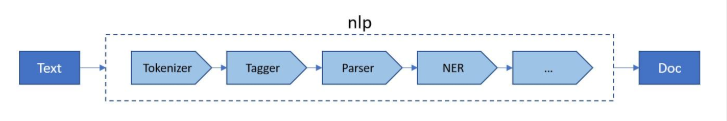spaCy NLP Pipeline

In this exercise, you'll continue to practice with text processing steps in spaCy, such as breaking the text into sentences and extracting named entities. You will use the first five reviews from the Amazon Fine Food Reviews dataset for this exercise. You can access these reviews by using the texts object.

The en_core_web_sm model has already been loaded for you to use, and you can access it by using nlp. The list of Doc containers for each item in texts is also pre-loaded and accessible at documents.

In [20]:
# Create a list to store sentences of each Doc container in documents
sentences = [[sent for sent in doc.sents] for doc in documents]

# Create a list to track number of sentences per Doc container in documents
num_sentences = [len([sent for sent in doc.sents]) for doc in documents]
print("Number of sentences in documents:\n", num_sentences, "\n")

# Record entities text and corresponding label of the third Doc container
third_text_entities = [(ent.text, ent.label_) for ent in documents[2].ents]
print("Third text entities:\n", third_text_entities, "\n")

# Record first ten tokens and corresponding POS tag for the third Doc container
third_text_10_pos = [(token.text, token.pos_) for token in documents[2]][:10]
print("First ten tokens of third text:\n", third_text_10_pos)

# You can see that spaCy is quite handy to process data.
# You can also see that NER model in en_core_web_sm spaCy English model is not quite correct, for example gelatin is classified as an organization (ORG). \
# Later, we will learn how to use EntityRuler to handcraft the correct NER results for this same example.

Number of sentences in documents:
 [3, 2, 7, 3, 4, 5, 5, 5, 3, 4] 

Third text entities:
 [('around a few centuries', 'DATE'), ('pillowy citrus gelatin', 'ORG'), ('Filberts', 'GPE'), ("C.S. Lewis'", 'ORG'), ('The Lion, The Witch', 'WORK_OF_ART'), ('Edmund', 'PRODUCT'), ('Sisters', 'PERSON'), ('Witch', 'ORG')] 

First ten tokens of third text:
 [('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('confection', 'NOUN'), ('that', 'PRON'), ('has', 'AUX'), ('been', 'AUX'), ('around', 'ADP'), ('a', 'DET'), ('few', 'ADJ')]
